Welcome to the library management

Library Management System
1. View All Books
2. Add a New Book
3. Remove a Book
4. Update a Book
5. Borrow a Book
6. Return a Book
7. Search for a Book
8. View Statistics and Visualizations
9. Exit
10. Add new data

Statistics:
Total number of books in the library: 6
Most borrowed genre: Novel


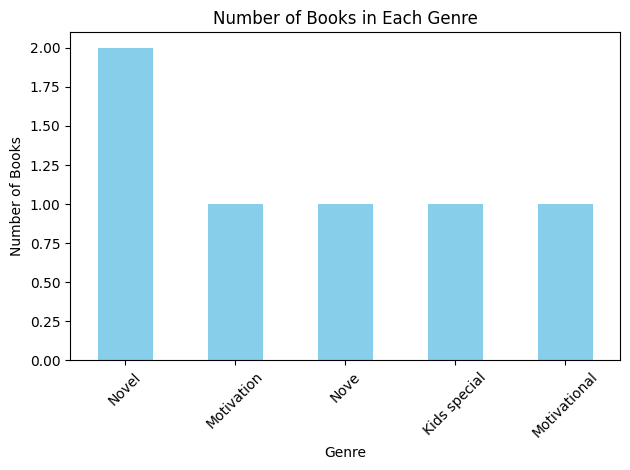

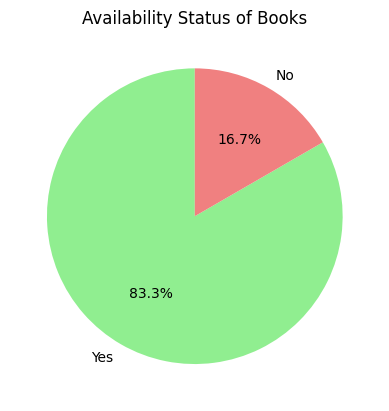


Library Management System
1. View All Books
2. Add a New Book
3. Remove a Book
4. Update a Book
5. Borrow a Book
6. Return a Book
7. Search for a Book
8. View Statistics and Visualizations
9. Exit
10. Add new data
The book is already borrowed.
Changes saved to CSV.

Library Management System
1. View All Books
2. Add a New Book
3. Remove a Book
4. Update a Book
5. Borrow a Book
6. Return a Book
7. Search for a Book
8. View Statistics and Visualizations
9. Exit
10. Add new data
Select what to update:
1. Update Availability
2. Update Borrower
Enter your choice: 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime
import os
file_name = 'library_inventory.csv'
def load_data():
    if os.path.exists(file_name):
        df = pd.read_csv(file_name)
    else:
        df = pd.DataFrame(columns=['Book ID', 'Title', 'Author', 'Genre', 'Availability', 'Borrower'])
        return df
    return df
def save_to_csv(df):
    df.to_csv(file_name, index=False)
df = pd.DataFrame(data)
def save_to_csv():
    df.to_csv('library_inventory.csv', index=False)
    print("Changes saved to CSV.")
def view_all_books():
    print("\nCurrent Library Inventory:")
    print(df)
def add_book():
    book_id = input("Enter Book ID: ")
    title = input("Enter Book Title: ")
    author = input("Enter Author Name: ")
    genre = input("Enter Book Genre: ")
    availability = input("Is the book available? (Yes/No): ")
    borrower = ""

    new_book = {
        'Book ID': book_id,
        'Title': title,
        'Author': author,
        'Genre': genre,
        'Availability': availability,
        'Borrower': borrower
    }

    global df
    df = pd.concat([df, pd.DataFrame([new_book])], ignore_index=True)
    print(f"Book '{title}' added successfully!")
    save_to_csv()
def remove_book():
    book_id = input("Enter Book ID to remove: ")
    global df
    df = df[df['Book ID'] != book_id]
    print(f"Book with ID {book_id} removed successfully.")
    save_to_csv()
def update_book():
    book_id = input("Enter Book ID to update: ")
    if book_id in df['Book ID'].values:
        print("Select what to update:")
        print("1. Update Availability")
        print("2. Update Borrower")
        choice = input("Enter your choice: ")

        if choice == '1':
            new_availability = input("Enter new availability (Yes/No): ")
            df.loc[df['Book ID'] == book_id, 'Availability'] = new_availability
            print(f"Book ID {book_id} availability updated to {new_availability}.")

        elif choice == '2':
            new_borrower = input("Enter new borrower name: ")
            df.loc[df['Book ID'] == book_id, 'Borrower'] = new_borrower
            print(f"Book ID {book_id} borrower updated to {new_borrower}.")

        else:
            print("Invalid choice.")
    else:
        print("Book ID not found.")
    save_to_csv()
def borrow_book():
    book_id = input("Enter Book ID to borrow: ")
    if book_id in df['Book ID'].values:
        if df.loc[df['Book ID'] == book_id, 'Availability'].values[0] == 'Yes':
            borrower_name = input("Enter borrower's name: ")
            df.loc[df['Book ID'] == book_id, 'Availability'] = 'No'
            df.loc[df['Book ID'] == book_id, 'Borrower'] = borrower_name
            print(f"Book ID {book_id} borrowed by {borrower_name}.")
        else:
            print("The book is already borrowed.")
    else:
        print("Book ID not found.")
    save_to_csv()
def return_book():
    book_id = input("Enter Book ID to return: ")
    if book_id in df['Book ID'].values:
        if df.loc[df['Book ID'] == book_id, 'Availability'].values[0] == 'No':
            df.loc[df['Book ID'] == book_id, 'Availability'] = 'Yes'
            df.loc[df['Book ID'] == book_id, 'Borrower'] = ''
            print(f"Book ID {book_id} returned successfully.")
        else:
            print("The book is already available.")
    else:
        print("Book ID not found.")
    save_to_csv()
def search_book():
    search_term = input("Enter search term (title, author, or genre): ")
    results = df[df.apply(lambda row: row.astype(str).str.contains(search_term, case=False, regex=False).any(), axis=1)]
    print("\nSearch Results:")
    print(results)
    export_option = input("Would you like to export the search results to a CSV file? (yes/no): ")
    if export_option.lower() == 'yes':
        results.to_csv('searched_books.csv', index=False)
        print("Search results exported to 'searched_books.csv'.")
def view_statistics():
    print("\nStatistics:")
    total_books = len(df)
    print(f"Total number of books in the library: {total_books}")
    borrowed_books = df[df['Borrower'] != '']
    if borrowed_books.empty:
        print("No books have been borrowed yet.")
        most_borrowed_genre = "N/A"
    else:
        most_borrowed_genre = borrowed_books['Genre'].value_counts().idxmax()
        print(f"Most borrowed genre: {most_borrowed_genre}")
    genre_counts = df['Genre'].value_counts()
    genre_counts.plot(kind='bar', color='skyblue')
    plt.title('Number of Books in Each Genre')
    plt.xlabel('Genre')
    plt.ylabel('Number of Books')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    availability_counts = df['Availability'].value_counts()
    availability_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90, legend=False)
    plt.title('Availability Status of Books')
    plt.ylabel('')
    plt.show()
df = load_data()
print ("Welcome to the library management")
while True:
        print("\nLibrary Management System")
        print("1. View All Books")
        print("2. Add a New Book")
        print("3. Remove a Book")
        print("4. Update a Book")
        print("5. Borrow a Book")
        print("6. Return a Book")
        print("7. Search for a Book")
        print("8. View Statistics and Visualizations")
        print("9. Exit")
        print("10. Add new data")

        choice = input("Enter your choice: ")

        if choice == '1':
            view_all_books()
        elif choice == '2':
            add_book()
        elif choice == '3':
            remove_book()
        elif choice == '4':
            update_book()
        elif choice == '5':
            borrow_book()
        elif choice == '6':
            return_book()
        elif choice == '7':
            search_book()
        elif choice == '8':
            view_statistics()
        elif choice == '9':
            print("Exiting the system...")
        elif choice == '10':
            add_book()
            save_to_csv()
        else:
            print("Invalid choice. Please try again.")

